In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns

In [2]:
ll = []

In [11]:
def net(p, n, o):
    l = []
    G1 = nx.read_gpickle(p)
    ed1 = G1.edges(data=True)
    
    for k, r in pd.read_csv(o).iterrows():
        try:
            nx.set_edge_attributes(G1, 'v',{(r["source"],r["target"]): r["v"]})
        except:
            pass
        try:
            nx.set_edge_attributes(G1, 'voru',{(r["source"],r["target"]): r["voru"]})
        except:
            pass

    for u,v,a in ed1:
        try:
            if G1.node[u]["community"] == G1.node[v]["community"]:
                l.append([u,v,G1.node[u]["community"],G1.node[v]["community"], a["v"],"inter", n])
            else:
                l.append([u,v,G1.node[u]["community"],G1.node[v]["community"], a["v"],"intra", n])
        except:
            pass
    return l

ll = ll + net("../data/pickle/reddit_comment_network_pagerank.gpickle", 
              "Reddit Comment","/Users/kershad1/PycharmProjects/Network-Simulations-Hadoop/reddit_comment.csv")
ll = ll + net("../data/pickle/reddit_traversal_network_pagerank.gpickle", 
              "Reddit Traversal","/Users/kershad1/PycharmProjects/Network-Simulations-Hadoop/reddit_traversal.csv")
ll = ll + net("../data/pickle/twitter_mention_network_pagerank.gpickle", 
              "Twitter Mention","/Users/kershad1/PycharmProjects/Network-Simulations-Hadoop/twitter_mention.csv")
ll = ll + net("../data/pickle/twitter_geo_network_pagerank.gpickle", 
              "Twitter Geo", "/Users/kershad1/PycharmProjects/Network-Simulations-Hadoop/twitter_geo.csv")

In [12]:
df = pd.DataFrame(ll, columns=["source","target","source_community","target_community","weight","class", "network"])

In [13]:
df.head()

,source,target,source_community,target_community,weight,class,network
0,EH21,EH20,0,0,0.015152,inter,Twitter Geo
1,EH21,EH23,0,0,0.125000,inter,Twitter Geo
2,EH21,EH22,0,0,0.055556,inter,Twitter Geo
3,EH21,G20,0,0,0.045455,inter,Twitter Geo
4,EH21,EH26,0,0,0.034483,inter,Twitter Geo


In [14]:
dft = df.set_index(["source","target","network"], drop=False)

In [15]:
dft["norm_weight"] = dft["weight"].div(dft.groupby(level=[0]).sum()["weight"],level=0)

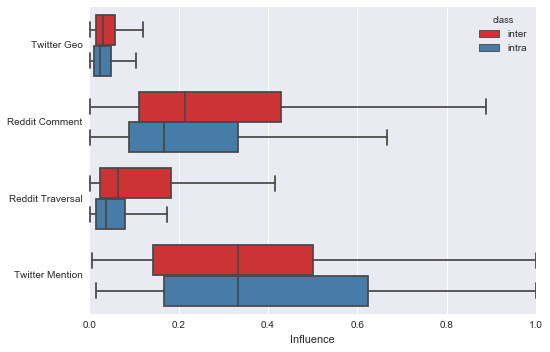

In [16]:
sns.boxplot(x="weight", y="network", data=dft, orient="h", palette="Set1", hue="class", showfliers=False)
sns.axlabel("Influence","")